In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r"D:\Hackathon-2025\KR MANGALAM\dataset\PlantVillage"

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

train_data = data_gen.flow_from_directory(
    dataset_path,  
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)

Found 33027 images belonging to 16 classes.


In [5]:
val_data = data_gen.flow_from_directory(
    dataset_path,  
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)


Found 8249 images belonging to 16 classes.


In [6]:
model = Sequential([
    Input(shape=(128, 128, 3)),  
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=val_data, epochs=10)

model.save("crop_disease_model.h5")

print("Class Labels:", train_data.class_indices)

Epoch 1/10


C:\Users\Piyush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 237s 226ms/step - accuracy: 0.4972 - loss: 1.6110 - val_accuracy: 0.2970 - val_loss: 2.0787
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 252s 243ms/step - accuracy: 0.5322 - loss: 1.0109 - val_accuracy: 0.2341 - val_loss: 2.7049
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 224s 216ms/step - accuracy: 0.5460 - loss: 0.8833 - val_accuracy: 0.2003 - val_loss: 2.7028
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 220s 213ms/step - accuracy: 0.5590 - loss: 0.8207 - val_accuracy: 0.1646 - val_loss: 3.4553
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 219s 211ms/step - accuracy: 0.5611 - loss: 0.7822 - val_accuracy: 0.1500 - val_loss: 3.6461
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 238s 230ms/step - accuracy: 0.5610 - loss: 0.7494 - val_accuracy: 0.1751 - val_loss: 3.7358
Epoch 7/10
 953/1033 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.5595 - loss: 0.7338

In [5]:
import cv2
import numpy as np

def preprocess_image(image_path):
    """Preprocess image for prediction"""
    img = cv2.imread(image_path)

    if img is None:
        print(f"❌ Error: Failed to load image at {image_path}")
        return None  

    img = cv2.resize(img, (128, 128))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

In [6]:
def predict_disease(image_path, model, class_labels):
    """Predict disease and display results"""
    processed_img = preprocess_image(image_path)

    if processed_img is None:
        print("❌ No image to process. Check file path.")
        return

    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction)  
    confidence = np.max(prediction) * 100  
    
    print(f"✅ Predicted Disease: {class_labels[predicted_class]}")
    print(f"🔹 Confidence: {confidence:.2f}%")

In [9]:
class_labels = {v: k for k, v in train_data.class_indices.items()}
print("Class Labels:", class_labels)  

image_path = "D:/Hackathon-2025/KR MANGALAM/dataset/PlantVillage/TestImage.jpg"

predict_disease(image_path, model, class_labels)


Class Labels: {0: 'Pepper__bell___Bacterial_spot', 1: 'Pepper__bell___healthy', 2: 'PlantVillage', 3: 'Potato___Early_blight', 4: 'Potato___Late_blight', 5: 'Potato___healthy', 6: 'Tomato_Bacterial_spot', 7: 'Tomato_Early_blight', 8: 'Tomato_Late_blight', 9: 'Tomato_Leaf_Mold', 10: 'Tomato_Septoria_leaf_spot', 11: 'Tomato_Spider_mites_Two_spotted_spider_mite', 12: 'Tomato__Target_Spot', 13: 'Tomato__Tomato_YellowLeaf__Curl_Virus', 14: 'Tomato__Tomato_mosaic_virus', 15: 'Tomato_healthy'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
✅ Predicted Disease: Pepper__bell___healthy
🔹 Confidence: 83.02%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


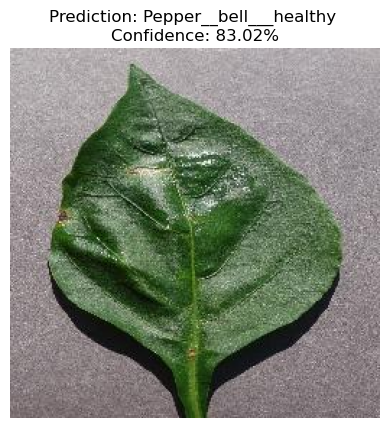

In [10]:
import matplotlib.pyplot as plt

def predict_and_display(image_path, model, class_labels):
    """Predict disease and display image with prediction"""
    processed_img = preprocess_image(image_path)

    if processed_img is None:
        print("❌ No image to process. Check file path.")
        return

    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction)  
    confidence = np.max(prediction) * 100  

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} \nConfidence: {confidence:.2f}%")
    plt.show()

image_path = r"D:\Hackathon-2025\KR MANGALAM\dataset\PlantVillage\TestImage.jpg"
predict_and_display(image_path, model, class_labels)